In [1]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import execute, Aer, BasicAer, IBMQ
from qiskit.tools.visualization import plot_histogram
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
import numpy as np
from matplotlib import pyplot as plt

In [2]:
q0 = QuantumRegister(4, 'q0')

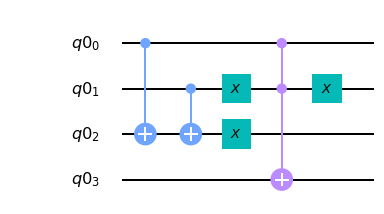

In [3]:
sub_circuit = QuantumCircuit(q0, name='Internal_Circuit')
sub_circuit.cx(q0[0],q0[2])
sub_circuit.cx(q0[1],q0[2])
sub_circuit.x(q0[2])
sub_circuit.x(q0[1])
sub_circuit.ccx(q0[0],q0[1],q0[3])
sub_circuit.x(q0[1])

sub_circuit.draw(output='mpl')

In [4]:
register = sub_circuit.to_instruction()

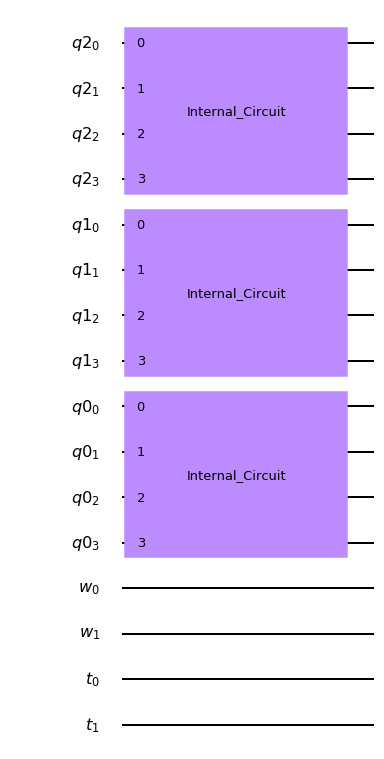

In [5]:
q1 = QuantumRegister(4, 'q2')
q2 = QuantumRegister(4, 'q1')
q3 = QuantumRegister(4, 'q0')
w = QuantumRegister(2, 'w')
t = QuantumRegister(2, 't')

a0 = QuantumCircuit(q1,q2,q3,w,t)

a0.append(register, [q1[0],q1[1],q1[2],q1[3]])
a0.append(register, [q2[0],q2[1],q2[2],q2[3]])
a0.append(register, [q3[0],q3[1],q3[2],q3[3]])

a0.draw(output='mpl')

In [6]:
a0.ccx(q1[2],q2[2],w[0])
a0.ccx(q3[2],w[0],w[1])
a0.cx(w[1],t[0])

In [7]:
a0.ccx(q3[2],w[0],w[1])
a0.ccx(q1[2],q2[2],w[0])

In [8]:
a0.ccx(q1[3],q2[3],w[0])
a0.ccx(q3[3],w[0],w[1])
a0.cx(w[1],t[1])

In [9]:
a0.ccx(q3[3],w[0],w[1])
a0.ccx(q1[3],q2[3],w[0])

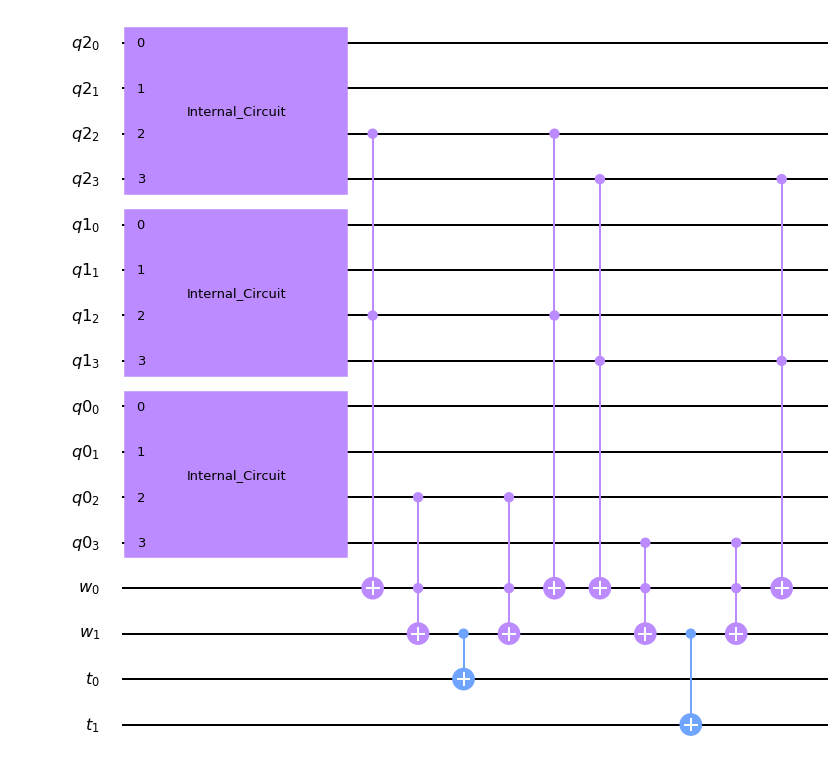

In [10]:
a0.draw(output='mpl')

In [11]:
a0.cx(q1[2],t[1])
a0.ccx(q1[2],q2[2],t[1])

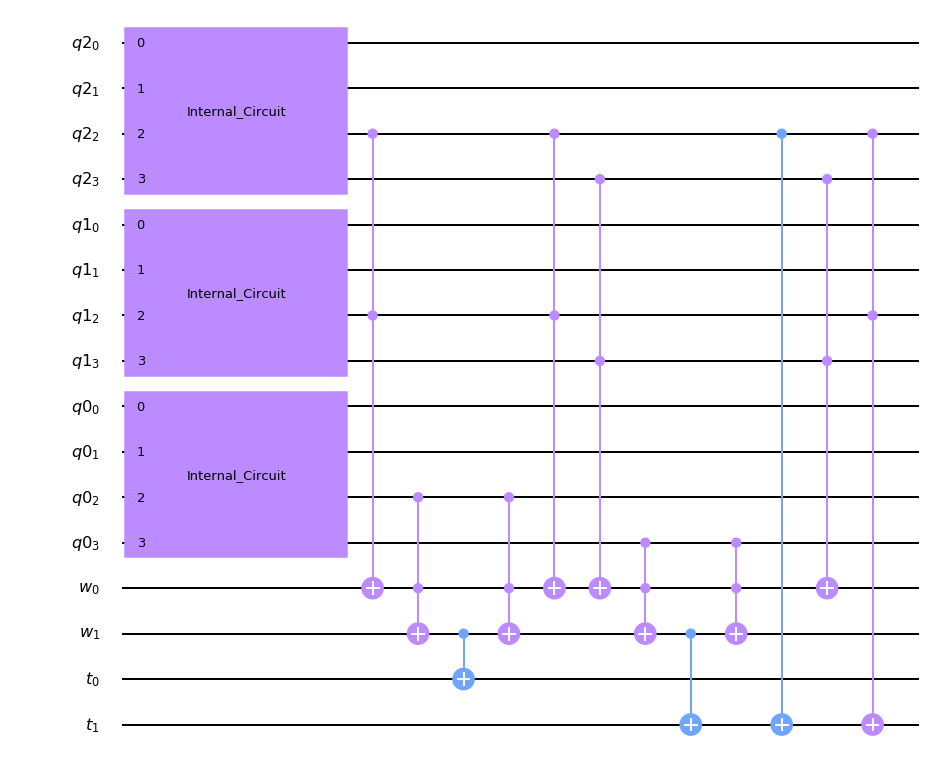

In [12]:
a0.draw(output='mpl')